# WeatherPy

---

In [2]:
%matplotlib inline

In [3]:
# Dependencies and Setup
from citipy import citipy
import numpy as np
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Import OpenWeatherMap API key
from api_key import weather_key

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Showcase the relationship between different weather variables and Latitude. First...

### Retrieve weather data from the cities list

In [5]:

# Set the API base URL and units
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'

# Empty list to store city weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{base_url}appid={weather_key}&units={units}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind_speed = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind_speed,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-gentil
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | portland
Processing Record 4 of Set 1 | te anau
Processing Record 5 of Set 1 | jardim
Processing Record 6 of Set 1 | maldonado
Processing Record 7 of Set 1 | oranjemund
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | chino valley
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | steenwijk
Processing Record 14 of Set 1 | tres arroyos
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | provideniya
Processing Record 22 of Set 1 | bengkul

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show count and head to ensure accuracy
print(city_data_df.count())
city_data_df.head(10)

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-gentil,-0.7193,8.7815,25.98,89,40,1.54,GA,1675812792
1,upernavik,72.7868,-56.1549,-29.67,98,73,1.32,GL,1675812793
2,portland,45.5234,-122.6762,9.99,94,100,3.58,US,1675812187
3,te anau,-45.4167,167.7167,13.80,44,55,5.00,NZ,1675812794
4,jardim,-21.4803,-56.1381,21.80,97,82,1.82,BR,1675812797
5,maldonado,-34.6667,-54.9167,24.66,64,20,5.50,UY,1675812528
6,oranjemund,-28.5500,16.4333,17.51,91,81,6.63,NA,1675812801
7,new norfolk,-42.7826,147.0587,16.51,42,8,0.69,AU,1675812804
8,lompoc,34.6391,-120.4579,21.50,65,40,3.60,US,1675812806
9,chino valley,34.7575,-112.4538,12.08,22,0,4.63,US,1675812683


In [7]:
# Export city_data to csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-gentil,-0.7193,8.7815,25.98,89,40,1.54,GA,1675812792
1,upernavik,72.7868,-56.1549,-29.67,98,73,1.32,GL,1675812793
2,portland,45.5234,-122.6762,9.99,94,100,3.58,US,1675812187
3,te anau,-45.4167,167.7167,13.80,44,55,5.00,NZ,1675812794
4,jardim,-21.4803,-56.1381,21.80,97,82,1.82,BR,1675812797


### Latitude Vs. Temperature

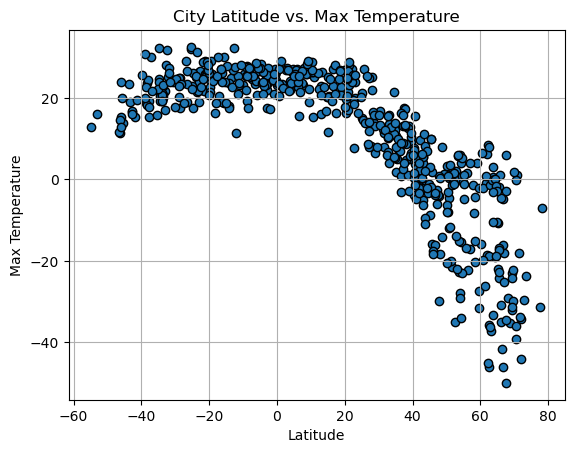

In [9]:
# Scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolors='black')

# Other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/MaxTemp_Scatter.png")

# Show plot
plt.show()

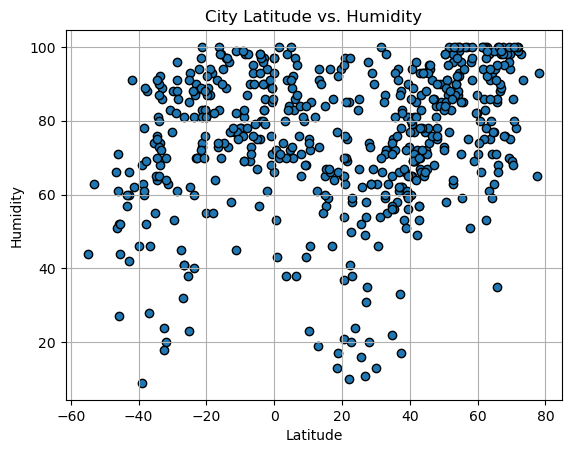

In [10]:
# Scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolors='black')

# Other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Humidity_Scatter.png")

# Show plot
plt.show()

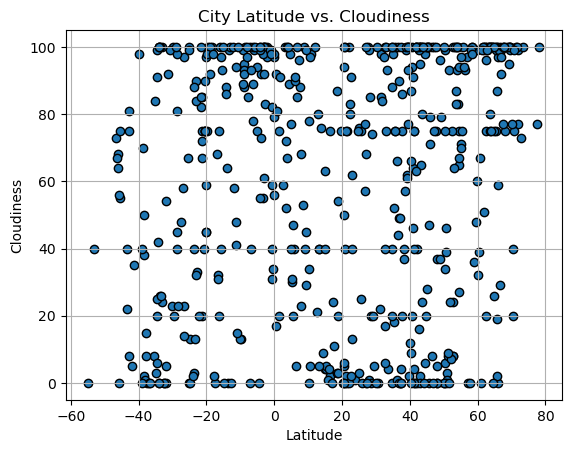

In [11]:
# Scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Clouds_Scatter.png")

# Show plot
plt.show()

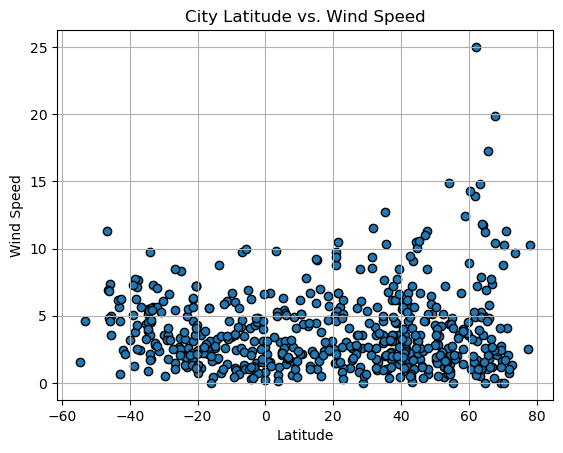

In [12]:
# Scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/WindSpeed_Scatter.png")

# Show plot
plt.show()

---

## Do these variables correlate? Linear Regression for each relationship

In [13]:
# Define Function to create linear regression plots
def my_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    print(f"The r-squared is: {rvalue**2}")


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,upernavik,72.7868,-56.1549,-29.67,98,73,1.32,GL,1675812793
2,portland,45.5234,-122.6762,9.99,94,100,3.58,US,1675812187
8,lompoc,34.6391,-120.4579,21.50,65,40,3.60,US,1675812806
9,chino valley,34.7575,-112.4538,12.08,22,0,4.63,US,1675812683
10,kapaa,22.0752,-159.3190,27.18,85,100,5.66,US,1675812744


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-gentil,-0.7193,8.7815,25.98,89,40,1.54,GA,1675812792
3,te anau,-45.4167,167.7167,13.80,44,55,5.00,NZ,1675812794
4,jardim,-21.4803,-56.1381,21.80,97,82,1.82,BR,1675812797
5,maldonado,-34.6667,-54.9167,24.66,64,20,5.50,UY,1675812528
6,oranjemund,-28.5500,16.4333,17.51,91,81,6.63,NaN,1675812801


---

### Max Temperature vs. Latitude Linear Regression Model

Upon analyzing the two linear regression models, it can be observed that as we get closer to the equator (latitude 0), the higher the max temperature is in the northern hemisphere. However in the Southern hemisphere, the linear regression model and r-value shows us that we cannot accurately predict the max temperature of a city based on its latitude.

The r-squared is: 0.7076152589405621


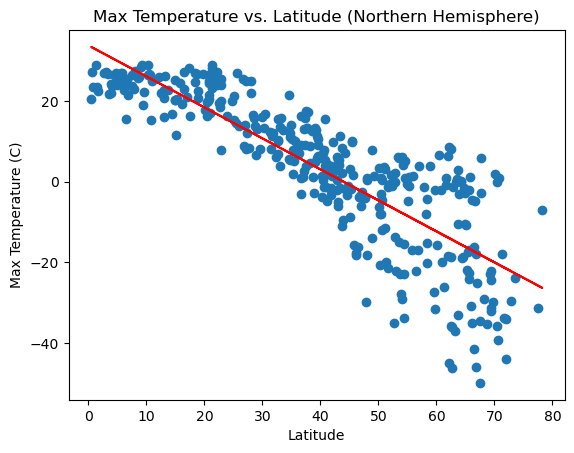

In [16]:
# Linear regression on Northern Hemisphere
my_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Max Temperature vs. Latitude (Northern Hemisphere)')
plt.show()


The r-squared is: 0.1613960179178906


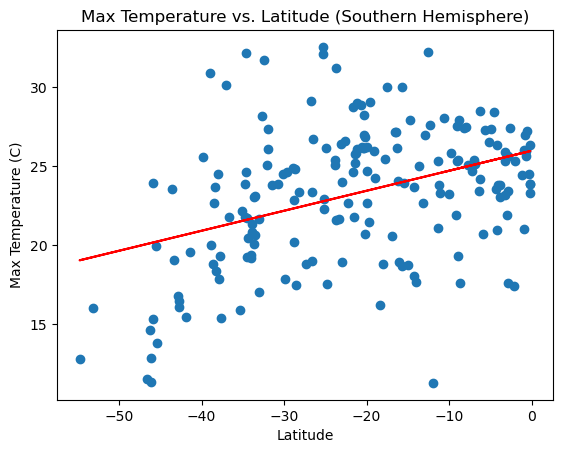

In [25]:
# Linear regression on Northern Hemisphere
my_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Max Temperature vs. Latitude (Southern Hemisphere)')
plt.show()


---

### Humidity vs. Latitude Linear Regression Plot

Based on the two linear regression models and r-values (12.8% for the northern hemisphere and 22.1% for the southern hemisphere), we cannot accurately predict the humidity percentage of a city based on its latitude. There is an extremely weak effect of latitude on max tempurature.

The r-squared is: 0.12807155621735156


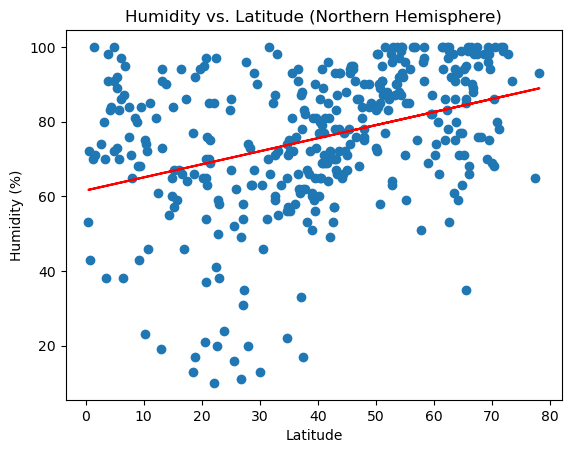

In [18]:
# Northern Hemisphere
my_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude (Northern Hemisphere)')
plt.show()

The r-squared is: 0.22081848032952187


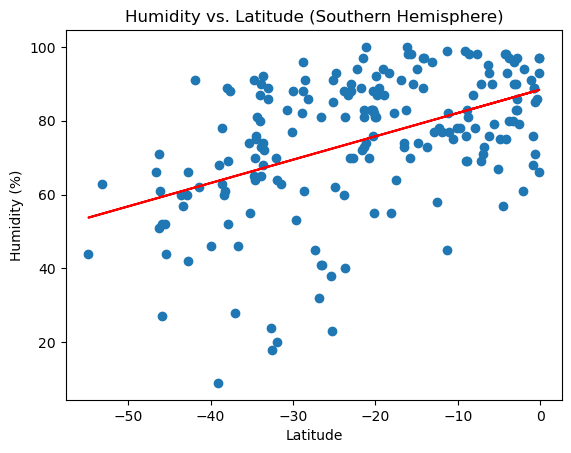

In [19]:
# Southern Hemisphere
my_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude (Southern Hemisphere)')
plt.show()

---

### Cloudiness vs. Latitude linear regression plot

Upon analyzing the two linear regression models, we can come to the same conclusion that there is almost no effect of latitude on cloudiness in both the Northern Hemisphere and the Southern Hemisphere as detailed by both models' r-values.

The r-squared is: 0.05446898304772603


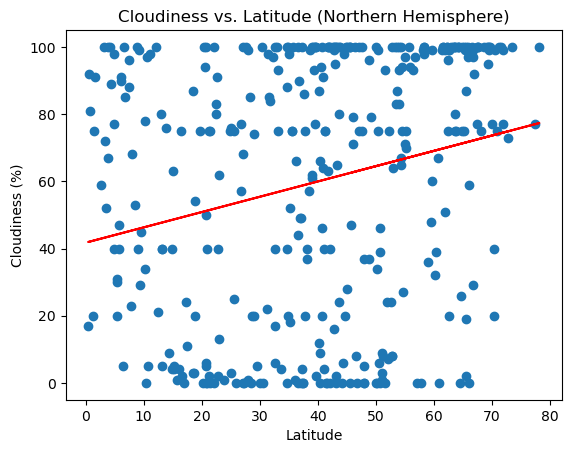

In [20]:
# Northern Hemisphere
my_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude (Northern Hemisphere)')
plt.show()

The r-squared is: 0.15530683009986695


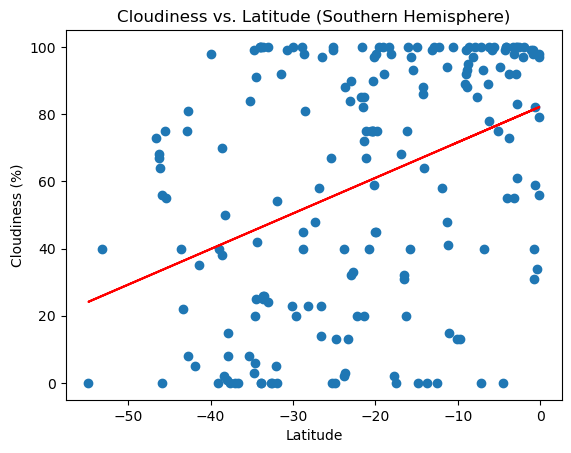

In [21]:
# Southern Hemisphere
my_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude (Southern Hemisphere)')
plt.show()

---

### Wind Speed vs. Latitude Linear Regression Plot

Similarly to the relationship between latitude and cloudiness seen above, we can come to the same conclusion that there is almost no effect of latitude on Wind Speed in both the Northern Hemisphere and the Southern Hemisphere. This conclusion is supported by the scatter plots' high-variability between the data points and by the models' r-values of 1.2% for the Northern hemisphere and 9.1% for the Southern hemisphere.

The r-squared is: 0.012098121722676585


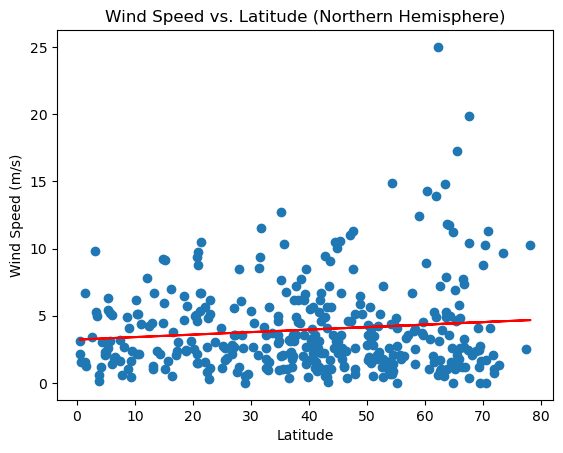

In [22]:
# Northern Hemisphere
my_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs. Latitude (Northern Hemisphere)')
plt.show()

The r-squared is: 0.0916850965022426


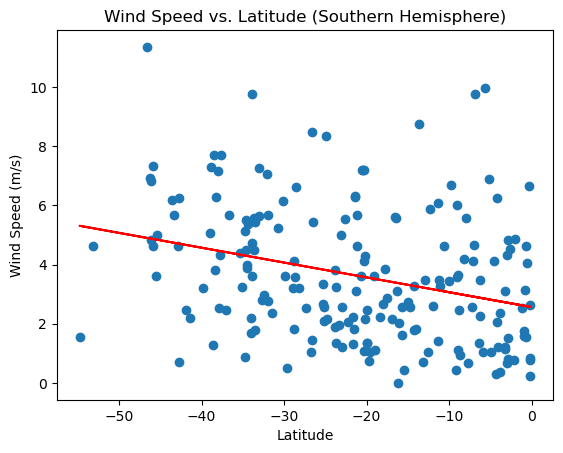

In [23]:
# Northern Hemisphere
my_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs. Latitude (Southern Hemisphere)')
plt.show()